# Titanic

Data set diperoleh dari Kaggle - membuat data visualization

In [1]:
#import library
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import klib

## Data load

In [2]:
df = pd.read_csv(r'E:\2. Informal School\17, Machine Learning\2/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Drop kolom Cabin, Name, PasserId dan Ticket, karen data yang dimiliki berbeda-beda setiap orang
df = df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis = 1)
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
#Mengisi kolom Age yang kosong
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [8]:
#Mengisi kolom Embarked yang kosong
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
#untuk melihat tipe data
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [11]:
#Menggantu tipe data Age
df['Age']=df['Age'].astype('int64')
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Visualization

<AxesSubplot:xlabel='Embarked', ylabel='count'>

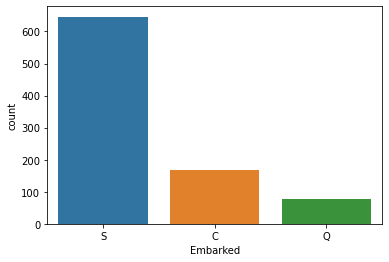

In [13]:
#Jumlah penumpang berdasarkan Port of Embarkation
sns.countplot(x=df['Embarked'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

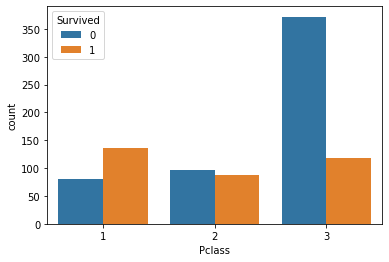

In [26]:
sns.countplot(x = df["Pclass"], hue = df["Survived"])

<AxesSubplot:xlabel='Survived', ylabel='Density'>

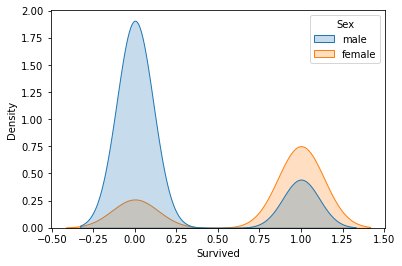

In [14]:
sns.kdeplot(x=df['Survived'], hue=df['Sex'], shade=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

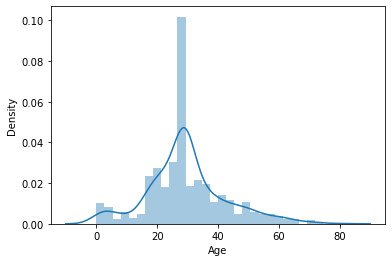

In [15]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

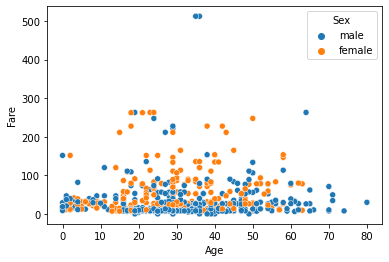

In [16]:
#sebaran harga tiket
sns.scatterplot(data=df, x=df['Age'], y=df['Fare'], hue=df['Sex'])

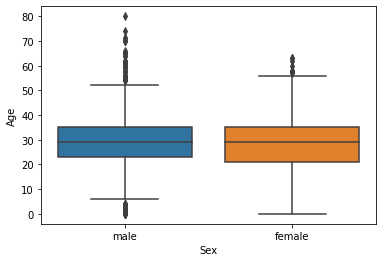

In [17]:
sns.boxplot(data=df, x='Sex', y='Age') # petal_width, sepal_length, sepal_width
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

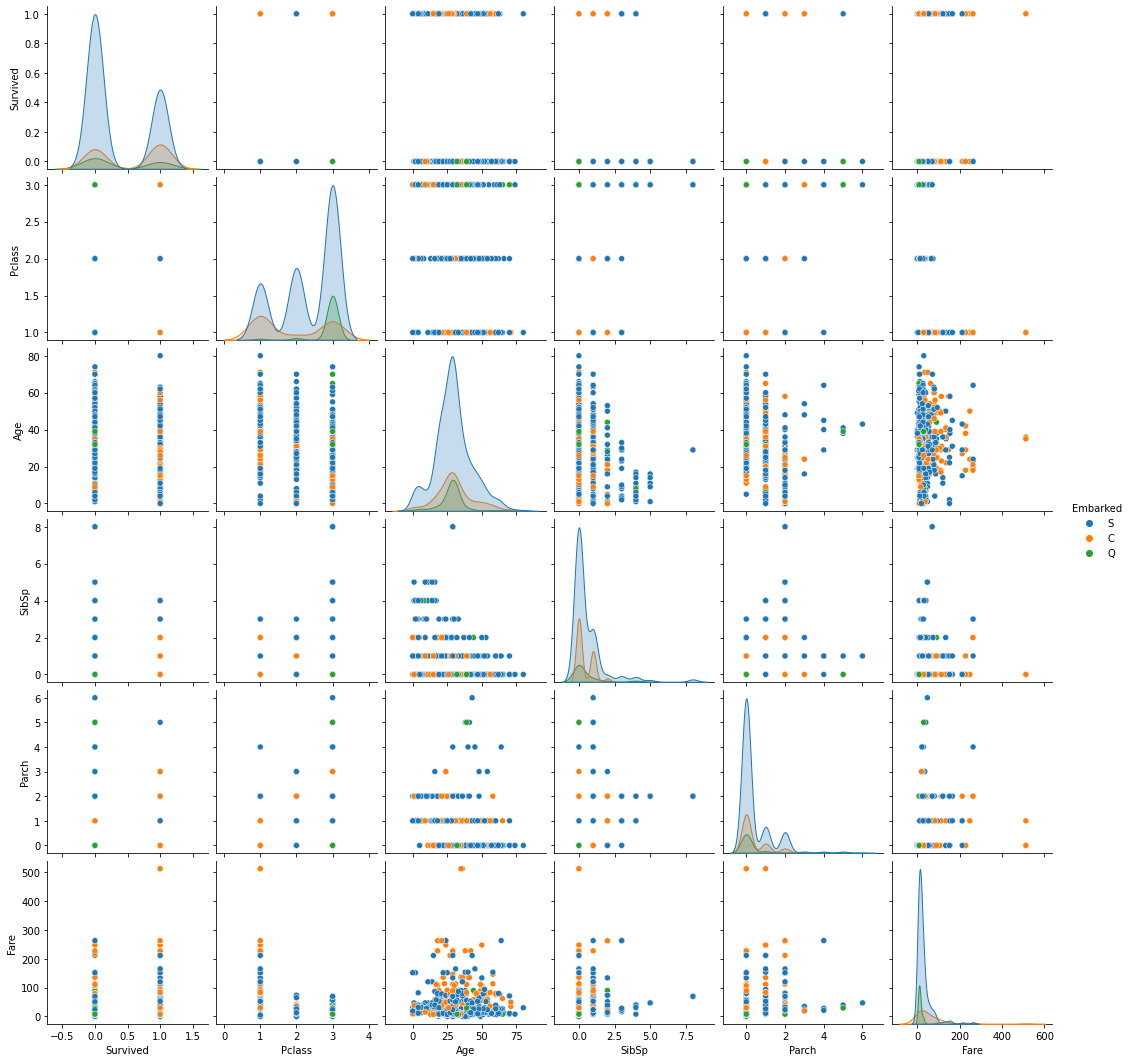

In [18]:
sns.pairplot(data=df, hue='Embarked')
plt.show()

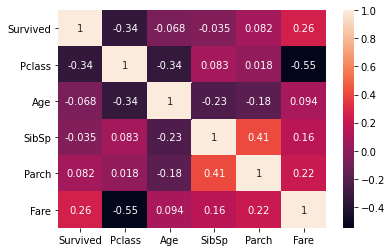

In [19]:
#menampilkan korelasi setiap jenis data
sns.heatmap(data=df.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Density'>

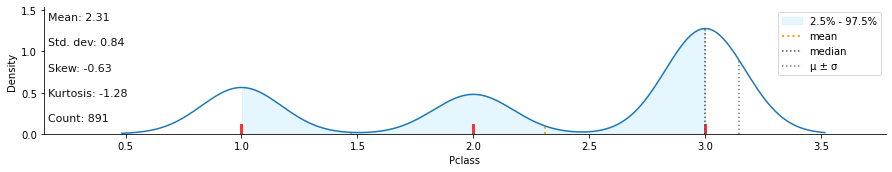

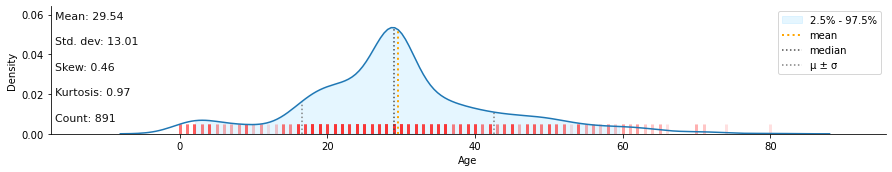

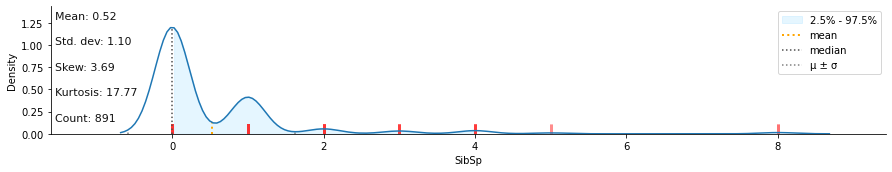

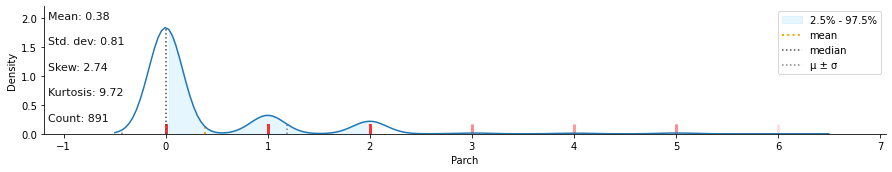

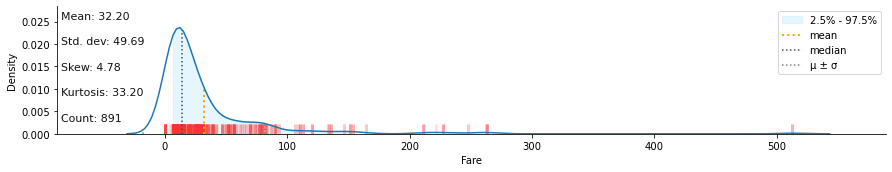

In [25]:
klib.dist_plot(df)